# Data collection

## ClaimReview

In [20]:
import requests
import json
from glob import glob
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import time

In [21]:
def getReviews(offset=0):
    params = {
        'hl': '', # the language to search
        'num_results': 1000,
        'query': 'list:recent',
        'force': 'false',
        'offset': offset
    }
    headers = {
        'dnt': '1',
        'accept-encoding': 'gzip, deflate, br',
        'accept-language': 'en-GB,en;q=0.9,it-IT;q=0.8,it;q=0.7,en-US;q=0.6',
        'user-agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36',
        'accept': 'application/json, text/plain, */*',
        'referer': 'https://toolbox.google.com/factcheck/explorer/search/list:recent;hl=en;gl=',
        'authority': 'toolbox.google.com',
        'cookie': os.environ.get('GOOGLE_FACTCHECK_EXPLORER_COOKIE')  # access authorization cookie data
    }
    response = requests.get('https://toolbox.google.com/factcheck/api/search', params=params, headers=headers)

    if response.status_code != 200:
        raise ValueError(response.status_code)

    content = json.loads(response.text[5:])[0][1:3]
    today = datetime.now().strftime("%B %d, %Y")
    path = "/Users/ageil/Github/FactMap/Data/claimreviews/raw/"+today+"/"
    filename = "raw_{0}.json".format(offset)
    
    if not os.path.isdir(path):
        os.makedirs(path)
    with open(path + filename, 'w') as f:
        json.dump(content, f, indent=2)
    
    return content

In [22]:
def collect():
    offset = 0
    claims = []
    tags = []
    
    while True:
        print('offset', offset)
        content = getReviews(offset=offset)
        if not content[0]:
            break
        offset += len(content[0])
        claims.append(content[0])
        tags.append(content[1])

    return claims, tags

Collect raw data:

In [23]:
raw = collect()

offset 0
offset 1000
offset 2000
offset 3000
offset 4000
offset 5000
offset 6000
offset 7000
offset 8000
offset 9000
offset 10000
offset 11000
offset 12000
offset 13000
offset 14000
offset 15000
offset 16000
offset 17000
offset 18000
offset 19000
offset 20000
offset 21000
offset 22000
offset 23000
offset 24000
offset 25000
offset 26000
offset 27000
offset 28000
offset 29000
offset 30000
offset 31000
offset 32000
offset 33000
offset 34000
offset 35000
offset 36000
offset 37000
offset 38000
offset 39000
offset 40000
offset 41000
offset 42000
offset 43000
offset 44000
offset 45000
offset 46000
offset 47000
offset 48000
offset 49000
offset 50000
offset 51000
offset 52000
offset 53000
offset 54000
offset 55000
offset 56000
offset 57000
offset 58000
offset 59000
offset 60000
offset 61000
offset 62000
offset 63000
offset 64000
offset 65000
offset 66000
offset 67000
offset 68000
offset 69000
offset 70000
offset 71000
offset 72000
offset 73000
offset 74000
offset 75000
offset 76000
offset 77000

Load collected raw data:

In [81]:
# today = datetime.now().strftime("%B %d, %Y")
path = "/Users/ageil/Github/FactMap/Data/claimreviews/raw/October 19, 2020/"
print(path)
raw_paths = glob(path+"*.json")

raw = []
for path in raw_paths:
    with open(path) as f:  
        raw.append(json.load(f))
        
print('batches:', len(raw))  # num batches

/Users/ageil/Github/FactMap/Data/claimreviews/raw/October 19, 2020/
batches: 93


clean up empty/faulty batches

In [102]:
for i in range(len(raw)):
    try:
        raw[i][0][2]
        raw[i][0][0][0]
        raw[i][0][0][1]
    except:
        print(i)

In [87]:
raw.pop(74)
raw.pop(57)

[[], []]

In [158]:
for i, batch in enumerate(raw):
    for j, c in enumerate(batch[0][2]):
        try:
            c[0]
            c[1]
        except:
            # print(batch[0][2])
            # print(c)
            print(i, j)


0 2
3 2
4 2
5 2
7 2
8 2
9 2
10 2
12 2
13 2
14 2
15 2
16 2
17 2
18 2
19 1
19 2
20 2
21 2
22 2
25 2
26 2
27 2
28 1
28 2
29 2
30 2
31 2
32 2
33 2
34 2
35 2
36 2
37 2
38 2
39 2
40 2
43 2
44 2
45 2
46 2
47 2
49 2
50 2
51 2
52 2
54 2
55 2
57 2
58 2
59 2
60 2
61 2
62 2
63 2
64 2
65 2
66 2
67 2
68 2
69 2
70 2
71 2
72 2
73 2
74 2
75 2
77 2
78 2
80 2
81 2
82 2
83 2
84 2
85 2
86 2
87 2
89 2
90 2


In [195]:
raw_claims = [c for batch in raw for c in batch[0]]
raw_tags = {c[0]: c[1] for batch in raw for c in batch[1]}

print("Num claims:\t", len(raw_claims))
print("Num tags:\t", len(raw_tags))

Num claims:	 90965
Num tags:	 39577


/m/ tags are Freebase identifiers  
/g/ tags are Google identifiers  
/t/ tags are ?

Parse data to ClaimReviews:

In [268]:
r[0][8]

[['/g/11j4xt9hdf',
  0.7198,
  ['/g/11ksrvgn0',
   '/g/11h0wc7vxg',
   '/g/11b7w3t1ph',
   '/g/11b696p7h',
   '/g/119q51_74']],
 ['/g/11f62_x7nf', 0.7033, ['/g/11vk58l0g', '/g/11vk58dgd']],
 ['/m/0d9cbr',
  0.6485,
  ['/g/11h6gzpvvw', '/g/11h3mv4vzq', '/g/11fdjvf5_', '/g/119pqzxb6']],
 ['/m/06cs1',
  0.5912,
  ['/g/11vk58tmy',
   '/g/11vk58hdb',
   '/g/11vk58fdx',
   '/g/11h6gzpvvw',
   '/g/11flz3djrp',
   '/g/11fknjvm47',
   '/g/11fdjvf5_',
   '/g/11cflqxpf',
   '/g/11cflqwgy',
   '/g/119x7b6v5',
   '/g/119pzbrll']],
 ['/m/01byzl',
  0.4986,
  ['/g/1yqlg8r7w',
   '/g/11vk5bc_b',
   '/g/11vk58_jj',
   '/g/11ksrvgn0',
   '/g/11h6gzpvvw',
   '/g/11fknjwsmh']]]

In [269]:
def parseReviews(reviews, tagdict):
    results = []
    for idx, r in enumerate(reviews):
        try:
            claimReview = {
                'reviewUrl': r[0][3][0][1],
                'claimReviewed': r[0][0],
                'lang': r[0][3][0][6],
                'countries': r[0][3][0][7],
                'claimReviewed_en': r[0][11] if len(r[0]) > 11 else None,
                'claimDate': r[0][2] if len(r[0]) > 2 else None,
                'reviewDate': r[0][3][0][2] if len(r[0][3][0]) > 2 else None,
                'reviewAuthor': {
                    "name": r[0][3][0][0][0],  # review author
                    "authorURL": r[0][3][0][0][1]
                },
                'reviewRating': {
                    'ratingValue': r[0][3][0][9][0] if (len(r[0][3][0]) > 9 and r[0][3][0][9] and len(r[0][3][0][9])) else -1,
                    'worstRating': r[0][3][0][9][1] if (len(r[0][3][0]) > 9 and r[0][3][0][9] and len(r[0][3][0][9])) else -1,
                    'bestRating': r[0][3][0][9][2] if  (len(r[0][3][0]) > 9 and r[0][3][0][9] and len(r[0][3][0][9])) else -1,
                    'alternateName': r[0][3][0][3]
                },
                'claimAuthor': {
                    'name': r[0][1][0],  # claim author
                    'claimURL': r[0][4][0][1] if len(r[0][4]) else None
                } if len(r[0][1]) else {},
                'tagsRaw': [{'keyword': tag[0], 'probability': tag[1]} for tag in r[0][8] if len(tag) == 3],
                'tagsNamed': [{'keyword': raw_tags[tag[0]], 'probability': tag[1]} for tag in r[0][8] if (tag[0] in raw_tags) and (len(tag) == 3)],
                'reviewTitle': r[0][3][0][8]
            }
            results.append(claimReview)
        except IndexError as e:
            print(idx)
            print(json.dumps(r))
            raise(e)
    return results

In [270]:
claims = parseReviews(raw_claims, raw_tags)
len(claims)

90965

Save parsed ClaimReviews to json:

In [272]:
# path = "/Users/ageil/Github/FactMap/Data/claimreviews/claims2020.json"

In [273]:
# with open(path, 'w') as f:
#     f.write('\n'.join(json.dumps(c) for c in claims))

Load parsed ClaimReviews:

In [206]:
paths = glob("/Users/ageil/Github/FactMap/Data/claimreviews/*.json")
latest = max(paths, key=os.path.getctime)
print('Latest file:', latest)

Latest file: /Users/ageil/Github/FactMap/Data/claimreviews/claims2020.json


In [293]:
latest = "/Users/ageil/Github/FactMap/Data/claimreviews/claims_May-01-2019.json"

In [300]:
claims = []
with open(latest) as f:
    for line in f:
        claims.append(json.loads(line))

In [301]:
# with open(latest, 'r') as fp:
#     claims = json.load(fp)

# print(len(claims))

---

Collect new claims:

In [69]:
raw = collect()
len(raw)

offset 0
offset 1000
offset 2000
offset 3000
offset 4000
offset 5000
offset 6000
offset 7000
offset 8000
offset 9000
offset 10000
offset 11000
offset 12000
offset 13000
offset 14000
offset 15000
offset 16000
offset 17000
offset 18000
offset 19000
offset 20000
offset 21000
offset 22000
offset 23000
offset 24000
offset 25000
offset 26000
offset 27000
offset 28000
offset 29000
offset 29028


2

In [306]:
raw_claims = [c for b in raw[0] for c in b]
raw_tags = {r[0]: r[1] for b in raw[1] for r in b if len(r) == 2}
        
print(len(raw_claims))
print(len(raw_tags))

In [289]:
# claims_new = claims

In [71]:
claims_new = parseReviews(raw_claims, raw_tags)
len(claims_new)

29028

In [307]:
hashes = set()
allclaims = []

for c in (claims + claims_new):
    hsh = hash(str(c))
    if hsh not in hashes:
        allclaims.append(c)
        hashes.add(hsh)
        
len(allclaims)

151025

In [308]:
claims = allclaims

Save combined claims to file:

In [310]:
today = datetime.now().strftime("%b-%d-%Y")
path = "/Users/ageil/Github/FactMap/Data/claimreviews/claims_2020_combined"

with open(path + today + ".json", 'w') as f:
    f.write('\n'.join(json.dumps(c) for c in claims))

Reload combined claims from file:

In [54]:
path = glob("/Users/anders1991/Github/FactMap/Data/claimreviews/claims_*")

claims = []
with open(path[0], 'r') as f:
    for line in f:
         claims.append(json.loads(line))
            
len(claims)

59747

---

## Summary statistics

Amount of ClaimReviews with source URLs:

In [312]:
urls = []
for i, c in enumerate(claims):
    try:
        if c['claimAuthor']['claimURL']:
            urls.append(c)
    except:
        None

print('Claims in total:\t', len(claims))
print('Claims w/ source URLs:\t', len(urls))
print('% of claims w/ URLs:\t', round(len(urls)/len(claims)*100, 1))

Claims in total:	 151025
Claims w/ source URLs:	 37007
% of claims w/ URLs:	 24.5


Number of unique topics found in ClaimReviews:

In [313]:
tpc = dict()

for c in claims:
    for t in list(c['tagsNamed']):
        if t['keyword'] in tpc.keys():
            tpc[t['keyword']] += 1
        else:
            tpc[t['keyword']] = 1

print('Num topics found in ClaimReviews:\t', len(tpc))

Num topics found in ClaimReviews:	 42704


In [314]:
top = sorted(tpc, key=tpc.get, reverse=True)[:10]

for c in top:
    print(c, tpc[c])

Video 7122
Coronavirus 6383
United States 5134
Donald Trump 5002
Government 4656
Photograph 4395
Coronavirus disease 2019 3916
Image 3752
India 3617
Child 3078


Number of distinct countries:

In [315]:
countries = dict()

for c in claims:
    for cntry in c['countries']:
        if cntry in countries.keys():
            countries[cntry] += 1
        else:
            countries[cntry] = 1
#         countries.add(cntry)
        
print(len(countries))

241


In [316]:
top = sorted(countries, key=countries.get, reverse=True)[:10]

for c in top:
    print(c, countries[c])

us 50324
in 30980
br 20426
gb 9746
fr 6675
id 5685
es 5606
ar 5351
it 5223
ru 5057


Number of distinct languages:

In [317]:
langs = dict()

for c in claims:
    lang = c['lang']
    if lang in langs.keys():
        langs[lang] += 1
    else:
        langs[lang] = 1
        
print(len(langs))

53


In [318]:
top = sorted(langs, key=langs.get, reverse=True)[:10]

for c in top:
    print(c, langs[c])

en 61696
pt 18544
es 10426
hi 8684
id 6285
pt-pt 4781
it 4102
tr 4081
fr 3562
ar 3413


Temporal distribution of claims:

In [319]:
x = np.histogram([c['claimDate'] for c in claims if c['claimDate'] is not None], bins=1000)

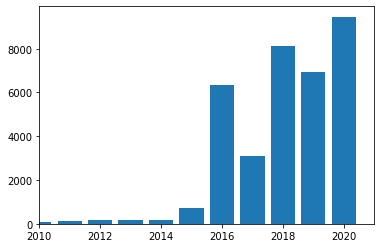

In [320]:
plt.bar([int(datetime.fromtimestamp(q).strftime('%Y')) for q in x[1][:-1]], x[0])
plt.xlim(2010, 2021)
plt.show()

Temporal distribution of reviews:

In [321]:
x = np.histogram([c['reviewDate'] for c in claims if c['reviewDate'] is not None], bins=1000)

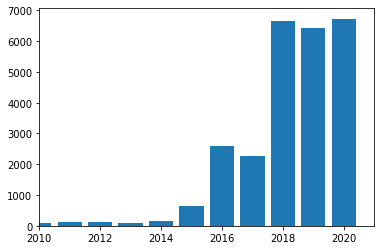

In [322]:
plt.bar([int(datetime.fromtimestamp(q).strftime('%Y')) for q in x[1][:-1]], x[0])
plt.xlim(2010, 2021)
plt.show()

~95% of data is from 2015 onwards!

---

# Collecting reddit data

In [547]:
def getSubmissions(after=1420070400):
    params = {
        'fields': ['id', 'created_utc', 'retrieved_on', 'subreddit_id', 'domain', 'author', 'title', 'subreddit', 'url',
                   'score', 'num_comments', 'subreddit_type', 'subreddit_subscribers'],
        'sort': 'asc',
        'is_self': False,
        'after': after,  # Jan 1, 2015: 00:00:00
        'size': '500'
    }

    response = requests.get('https://api.pushshift.io/reddit/search/submission/', params=params)

    if response.status_code != 200:
        raise ValueError(response.status_code)

    data = json.loads(response.text)['data']

    return data

In [546]:
def collectSubmissions(after=1420070400):
    after = after
    num = 0
    submissions = []
    requests_per_minute = 180
    requests = 0
    start_time = time.time()
    print('Initiating...')

    while True:
        print('Num:', num)
        time_diff = time.time() - start_time

        if requests < requests_per_minute and time_diff < 60:
            requests += 1
            data = getSubmissions(after=after)

            if not data[0]:
                break

            num += len(data)
            after = data[-1]['created_utc']
            submissions.append(data)

            if num > 2000000 or data[0] is None:  # dump to file if >2M submissions
                path = "/Users/anders1991/Github/FactMap/Data/reddit/raw/"
                filename = "raw_{0}.json".format(after)

                if not os.path.isdir(path):
                    os.makedirs(path)
                with open(path + filename, 'w') as f:
                    json.dump(submissions, f, indent=2)

                submissions = []
                num = 0
        elif time_diff >= 60:
            start_time = time.time()
            requests = 0
        else:
            print('Waiting', 60-time_diff, 'seconds...')
            time.sleep(60-time_diff)

            start_time = time.time()
            requests = 0

    print('Finished!')

    return submissions

In [583]:
# out = collectSubmissions()

Takes too long to download via API!

Downloaded via Google BigQuery instead.

---

In [326]:
with open('/Users/ageil/Github/FactMap/Data/reddit/2019/RS_2019-04', 'r') as f:
    for line in f:
        js = json.loads(line)
        print(js)
        break

{'all_awardings': [], 'archived': False, 'author': '[deleted]', 'author_created_utc': None, 'author_flair_background_color': '', 'author_flair_css_class': None, 'author_flair_template_id': None, 'author_flair_text': None, 'author_flair_text_color': 'dark', 'author_fullname': None, 'can_gild': False, 'can_mod_post': False, 'category': None, 'content_categories': None, 'contest_mode': False, 'created_utc': 1554076800, 'distinguished': None, 'domain': 'self.AskReddit', 'edited': False, 'gilded': 0, 'gildings': {}, 'hidden': False, 'id': 'b7um2l', 'is_crosspostable': False, 'is_meta': False, 'is_original_content': False, 'is_reddit_media_domain': False, 'is_robot_indexable': False, 'is_self': True, 'is_video': False, 'link_flair_background_color': '', 'link_flair_css_class': None, 'link_flair_richtext': [], 'link_flair_text': None, 'link_flair_text_color': 'dark', 'link_flair_type': 'text', 'locked': False, 'media': None, 'media_embed': {}, 'media_only': False, 'no_follow': True, 'num_comm

In [327]:
json.dumps(js)

'{"all_awardings": [], "archived": false, "author": "[deleted]", "author_created_utc": null, "author_flair_background_color": "", "author_flair_css_class": null, "author_flair_template_id": null, "author_flair_text": null, "author_flair_text_color": "dark", "author_fullname": null, "can_gild": false, "can_mod_post": false, "category": null, "content_categories": null, "contest_mode": false, "created_utc": 1554076800, "distinguished": null, "domain": "self.AskReddit", "edited": false, "gilded": 0, "gildings": {}, "hidden": false, "id": "b7um2l", "is_crosspostable": false, "is_meta": false, "is_original_content": false, "is_reddit_media_domain": false, "is_robot_indexable": false, "is_self": true, "is_video": false, "link_flair_background_color": "", "link_flair_css_class": null, "link_flair_richtext": [], "link_flair_text": null, "link_flair_text_color": "dark", "link_flair_type": "text", "locked": false, "media": null, "media_embed": {}, "media_only": false, "no_follow": true, "num_com